In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use the magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision.transforms import transforms
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import math
import time
from sklearn.metrics import r2_score
#from termcolor import cprint
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score                # we are using this for model tunning

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models
from tensorflow.keras import layers


C:\Users\alejo\AppData\Local\Temp\ipykernel_24152\2147761841.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [11]:
df = pd.read_csv(r'Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<AxesSubplot: >

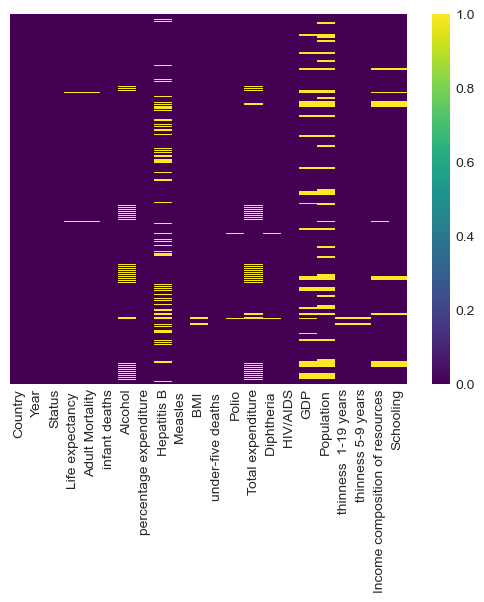

In [13]:
# Checking the Missing Values
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [10]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [14]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
  s = s [s > 0]
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

suspects = missingness_summary(df, True, 'descending')

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 BMI                                1.157250
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64


In [15]:
#Dropping Life expectancy and adult mortality.
df.dropna(subset=['Life expectancy ', 'Adult Mortality'], inplace=True)

suspects = missingness_summary(df, False)
drop_suspects = suspects[ suspects < 5 ]
drop_suspects

Polio                    0.648907
Diphtheria               0.648907
 BMI                     1.092896
 thinness  1-19 years    1.092896
 thinness 5-9 years      1.092896
dtype: float64

In [16]:
# Groupby

df[df[drop_suspects.keys()].isnull().any(axis=1)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,NaN,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9


In [17]:
var = ['Life expectancy '] #variable of interest
lost_development = list(drop_suspects.keys())
lost_development.extend(var)

#Lost Development dataframe. Short name for easy access.
ld = df[lost_development]
ld = ld.dropna()

#No Missing Values for the lost development dataframe. 
missingness_summary(ld)

Series([], dtype: float64)

In [19]:
#Remove the drop_suspect features from the dataset. We will not use them with this dataset as this subset of data is incomplete.
cols = list(df.columns)
cols = [x for x in cols if x not in drop_suspects.keys()]

#My new Life Expectancy dataframe, without those few missing entries.
le = df[cols]

In [20]:
miss = missingness_summary(le, True)

Income composition of resources     5.464481
Schooling                           5.464481
Alcohol                             6.591530
Total expenditure                   7.718579
GDP                                15.129781
Hepatitis B                        18.886612
Population                         21.994536
dtype: float64


In [21]:
le[le[miss.keys()].isnull().any(axis=1)].sort_values(['Country','Year'])

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,25,3.49,0.1,1757.177970,3118366.0,0.636,10.7
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,24,3.84,0.1,1732.857979,31592153.0,0.644,10.9
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,23,3.73,0.1,1774.336730,3199546.0,0.653,11.1
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,23,3.60,0.1,294.335560,3243514.0,0.663,11.5
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,24,NaN,0.1,4132.762920,39871528.0,0.743,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,66,6.93,18.4,377.135244,111249.0,0.433,10.0
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,62,8.18,18.2,429.158343,11421984.0,0.443,10.2
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,59,7.33,17.6,53.277222,11731746.0,0.456,10.5
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,40,NaN,4.1,1313.889646,161587.0,0.576,12.5


In [22]:
le[le['Schooling'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,79,NaN,1.9,NaN,NaN,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,80,5.72,2.0,NaN,NaN,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,81,5.81,2.4,NaN,NaN,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,82,6.14,2.9,NaN,NaN,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,83,6.42,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,33,15.14,0.1,NaN,NaN,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,33,15.60,0.1,NaN,NaN,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,33,14.55,0.1,NaN,NaN,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,33,13.73,0.1,NaN,NaN,NaN,NaN


In [23]:
omit = ['Total expenditure', 'Hepatitis B', 'Income composition of resources', 'Alcohol', 'Population', 'Schooling', 'GDP']

#drop those features you don't want to use right now. 
cols =  [x for x in cols if x not in omit]
le = le[cols]
miss = missingness_summary(le, True)

Series([], dtype: float64)


In [24]:
data = le.copy()

In [25]:
# Filling in
data["Life expectancy "]=data["Life expectancy "].replace(0,np.nan)

data["Adult Mortality"]=data["Adult Mortality"].replace(0,np.nan)

data.fillna(data.median(),inplace=True)

In [26]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,under-five deaths,HIV/AIDS
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,83,0.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,86,0.1
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,89,0.1
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,93,0.1
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,97,0.1
...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,42,33.6
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,41,36.7
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,40,39.8
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,39,42.1


In [27]:
data.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
percentage expenditure    0
Measles                   0
under-five deaths         0
 HIV/AIDS                 0
dtype: int64

In [28]:
features=['Adult Mortality',' HIV/AIDS','Measles ']

In [29]:
### Defining the Axis's
x=data[features]
y=data['Life expectancy '].values

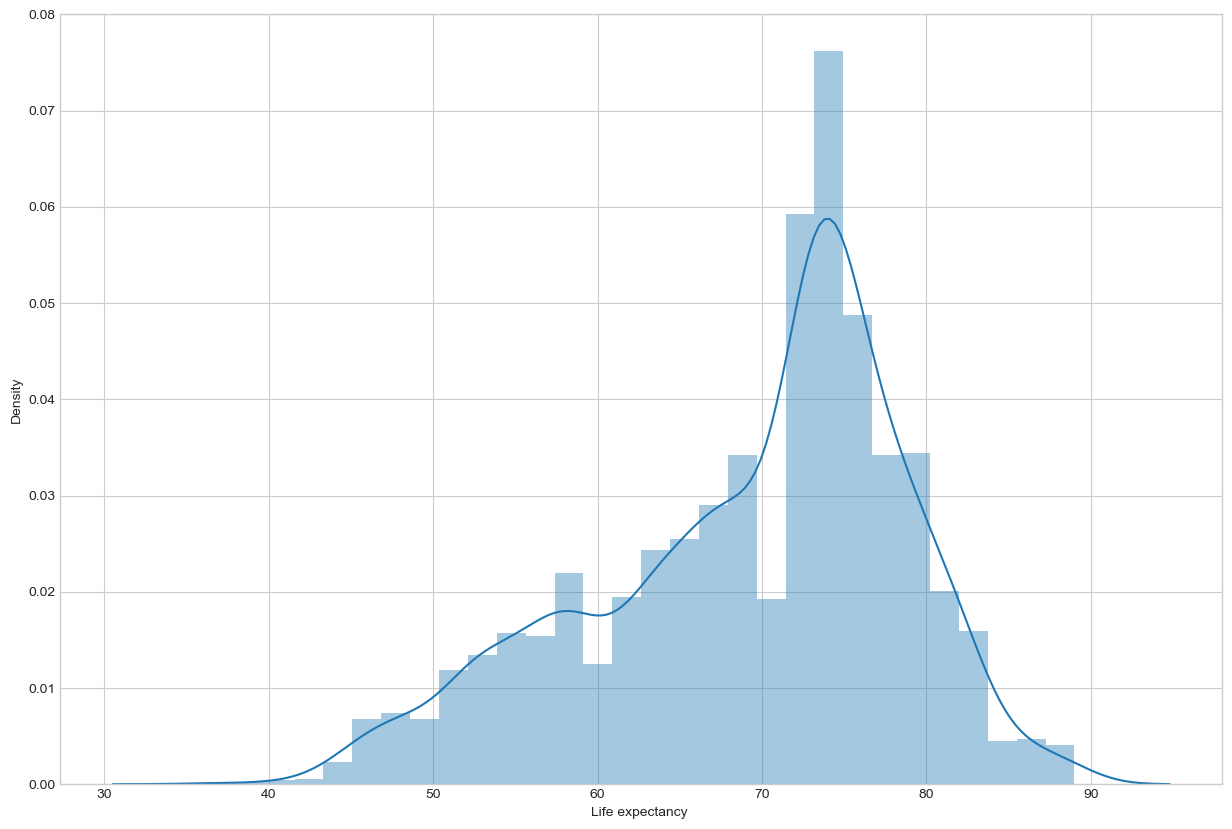

In [33]:
# PLotting the Target

plt.figure(figsize=(15,10),dpi=100)

plt.tight_layout()

sns.distplot(data['Life expectancy '])

plt.show()

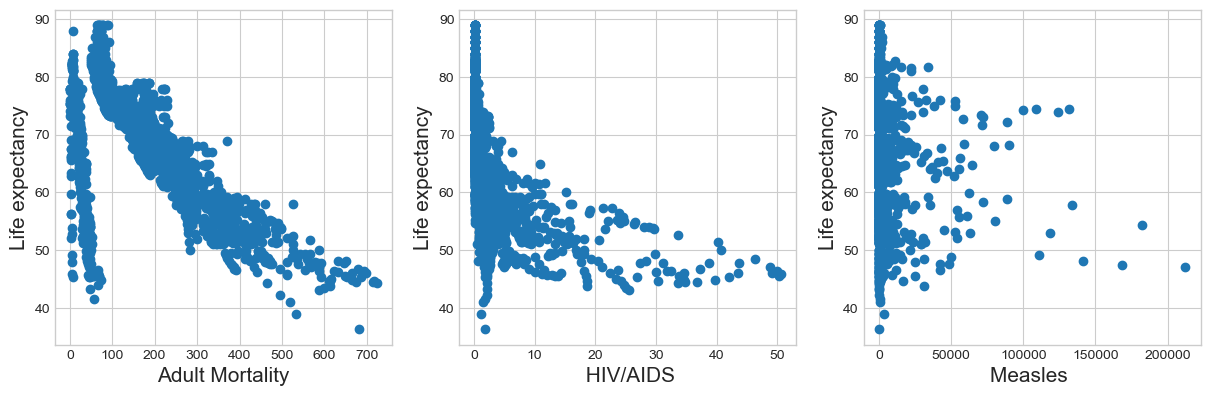

In [34]:
# Plottting the Features

plt.figure(figsize=(20,20),dpi=100)

for index, feature_name in enumerate(data[features]):
    plt.subplot(4,4,index+1)
    plt.scatter(data[feature_name],data['Life expectancy '])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(feature_name,size=15)